In [ ]:
import pandas as pd

### 예제 문제 
1. csv 폴더 안에 있는 tran_1, tran_2 파일 로드 
2. 두개의 데이터프레임을 단순하게 행을 추가하는 결합
3. csv 폴더 안에 있는 tran_d_1, tran_d_2 파일 로드 
4. 두개의 데이터프레임을 단순하게 행을 추가하는 결합 
5. 2번 과정에서 나온 데이터프레임과 4번 과정에서 나온 데이터프레임을 특정한 조건에 맞춰서 열을 결합 기준은 2번 데이터프레임을 기준으로 결합

In [ ]:
# tran_1, tran_2 로드해서 유니언 결합
tran_1 = pd.read_csv("../../csv/tran_1.csv")
tran_2 = pd.read_csv("../../csv/tran_2.csv")
print(tran_1.head(1))
print(tran_2.head(1))

In [ ]:
tran = pd.concat([tran_1, tran_2], axis=0, ignore_index=True)

In [ ]:
tran_d_1 = pd.read_csv('../../csv/tran_d_1.csv')
tran_d_2 = pd.read_csv('../../csv/tran_d_2.csv')
print(tran_d_1.head(1))
print(tran_d_2.head(1))

In [ ]:
tran_d = pd.concat([tran_d_1, tran_d_2], axis=0, ignore_index=True)

In [ ]:
print(tran.head(1))
print(tran_d.head(1))

In [ ]:
# tran, tran_d 두개의 데이터프레임을 조인결합 
tran = pd.merge(tran, tran_d, on = 'transaction_id', how = 'inner')

In [ ]:
tran_d['transaction_id'].value_counts()

1. csv폴더에서 customer_master, item_master 파일 로드 
2. 4개의 데이터프레임이 결합되어 있는 tran 데이터프레임에 조인 결합

In [ ]:
customer = pd.read_csv("../../csv/customer_master.csv")
customer.head(1)

In [ ]:
tran.head(1)

In [ ]:
tran = pd.merge(tran, customer, on='customer_id', how='left')

In [ ]:
item = pd.read_csv('../../csv/item_master.csv')
item.head(1)

In [ ]:
tran.head(1)

In [ ]:
df = pd.merge(tran, item, on='item_id', how='left')

In [ ]:
df.info()

In [ ]:
df[['price', 'quantity', 'item_price']]

1. 거래금액이 가장 큰 데이터는 무엇인가?
2. 거래가 가장 많이 된 물품의 상위 1개를 출력

In [ ]:
df['price'].max()

In [ ]:
# price를 기준으로 내림차순 -> 상위 5개 
df.sort_values('price', ascending=False).head(5)

In [ ]:
## 거래가 가장 많이 된 물품을 확인 
# 1. 아이템을 기준으로 그룹화 -> quantity의 합계
group_data = df[['item_id', 'quantity']].groupby('item_id').sum()
# group_data에서 quantity를 기준으로 내림차순 정렬 -> 상위 3개
group_data.sort_values('quantity', ascending=False).head(3)

In [ ]:
df2 = df.drop('price', axis=1)

1. df2에서 total_price를 생성
2. total_price는 tracsaction_id를 기준으로 거래 금액의 합계
3. price -> item_price * quantity 파생변수 생성
4. transaction_id를 기준으로 그룹화 price의 합계
5. 그룹화 데이터의 컬럼의 이름을 total_price 변경
6. 그룹화한 데이터의 price를 df2 조인결합을 이용해서 열 결합

In [ ]:
df2['price'] = df2['item_price'] * df2['quantity']

In [ ]:
# df2[['transaction_id', 'price']].groupby('transaction_id').sum()
group_data = df2.groupby('transaction_id').sum()[['price']]

In [ ]:
# group_data의 컬럼의 이름을 total_price 변경
group_data.columns = ['total_price']
group_data.head(1)

In [ ]:
group_data.reset_index(inplace=True)

In [ ]:
df2 = pd.merge(df2, 
         group_data, 
         on = 'transaction_id',
         how='left')

In [ ]:
df.head(10)

In [ ]:
df2.head(10)

In [ ]:
(df['price'] == df2['total_price']).value_counts()

In [62]:
df.tail(5)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price
7139,T0000006894,180000,2019-07-31 21:20:44,HI400734,7139,S004,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PC-D,180000
7140,T0000006895,85000,2019-07-31 21:52:48,AS339451,7140,S002,1,XXXXX,C01,M,2016-07-01 00:00:00,NaN,CA2,0.0,PC-B,85000
7141,T0000006896,100000,2019-07-31 23:35:25,OA027325,7141,S001,2,XX,C03,F,2018-12-02 00:00:00,NaN,CA3,0.0,PC-A,50000
7142,T0000006897,85000,2019-07-31 23:39:35,TS624738,7142,S002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PC-B,85000
7143,T0000006898,85000,2019-07-31 23:41:38,AS834214,7143,S002,1,XXXXX,C01,M,2017-05-01 00:00:00,2018-05-31 00:00:00,CA1,1.0,PC-B,85000


1. payment_date컬럼의 데이터의 타입을 시계열로 변경
2. gender컬럼의 데이터를 M -> 남자, F -> 여자 로 데이터를 변경
3. 시계열에서 데이터에서 년도-월 따로 추출해서 payment_month 생성

In [64]:
# 시계열로 데이터의 타입을 변경 
df['payment_date'] = \
     pd.to_datetime(df['payment_date'], format= "%Y-%m-%d %H:%M:%S")

In [ ]:
df.info()

In [71]:
for_df = df.copy()

In [73]:
# 성별의 데이터가 존재하지 않으면 무응답 
# F -> 여자, M -> 남자


# case1(조건문 사용)
for_df['gender']

# for문 이용해서 인덱스만큼 반복 
for i in for_df.index:
    # gender항목들은 하나씩 출력 
    # print(df.loc[i, 'gender'])
    gender = for_df.loc[i, 'gender']
    if gender == "M":
        result = '남자'
    elif gender == "F":
        result = '여자'
    else:
        result = '무응답'
    
    for_df.loc[i, 'gender'] = result

for_df['gender'].value_counts()


남자     3268
여자     2801
무응답    1075
Name: gender, dtype: int64

In [78]:
apply_df = df.copy()

In [79]:
# case2 (apply + 일반함수)
def change(x):
    if x == 'M':
        result = '남자'
    elif x == 'F':
        result = '여자'
    else:
        result = '무응답'
    
    return result

apply_df['gender'] = apply_df['gender'].apply(change)

apply_df['gender'].value_counts()

남자     3268
여자     2801
무응답    1075
Name: gender, dtype: int64

In [80]:
lambda_df = df.copy()

In [82]:
# case3 (apply + lambda)

lambda_df['gender'] = lambda_df['gender'].apply(
    lambda x : \
        "남자" if (x == "M") else \
        ("여자" if (x == "F") else "무응답") 
)

lambda_df['gender'].value_counts()

남자     3268
여자     2801
무응답    1075
Name: gender, dtype: int64

In [83]:
loc_df = df.copy()

In [87]:
# case4 (loc를 이용)

# gender가 M인 인덱스를 조건으로 gender라는 컬럼을 선택해서 해당하는 값들을 변경
loc_df.loc[loc_df['gender'] == "M", 'gender'] = '남자'
# gender가 F인 인덱스를 조건으로 gender라는 컬럼을 선택해서 해당하는 값들을 변경
loc_df.loc[loc_df['gender'] == 'F', 'gender'] = '여자'
# gender가 결측치인 인덱스를 조건으로 gender라는 컬럼을 선택해서 해당하는 값들을 변경
loc_df.loc[loc_df['gender'].isna(), 'gender'] = '무응답'

loc_df['gender'].value_counts()

남자     3268
여자     2801
무응답    1075
Name: gender, dtype: int64

In [88]:
df2 = loc_df.copy()

In [100]:
# payment_month 파생변수 생성
# payment_date에 있는 시계열 데이터에서 년도-월 추출해서 대입
df2['payment_month'] = df2['payment_date'].dt.strftime("%m/%Y")

In [94]:
a = "2023-8-10 15:12:00"
# "2023-08" 부분만 출력하려면?
print(a[:7])
# split() : 특정한 문자열을 가지고 문자열데이터를 잘라준다.
print(a.split('-')[0] +"-"+a.split('-')[1])

2023-8-
2023-8


In [ ]:
df2.info()

In [107]:
# 1. df2의 transaction_id를 기준으로 그룹화 price, payment_month의 최소값으로 되어있는 데이터프레임을 생성
group_data = \
df2[['transaction_id', 'price', 'payment_month']].groupby('transaction_id').min()
# 2. 1번 작업에서 만들어진 데이터프레임에서 월별 price의 평균과 합계를 출력
month_data = group_data.groupby('payment_month').agg(['mean', 'sum'])

In [108]:
import matplotlib.pyplot as plt

### subplot()
- 한 화면에 여러 그래프를 그리는 방법
- subplot(행의수, 열의수, 그래프의 위치)

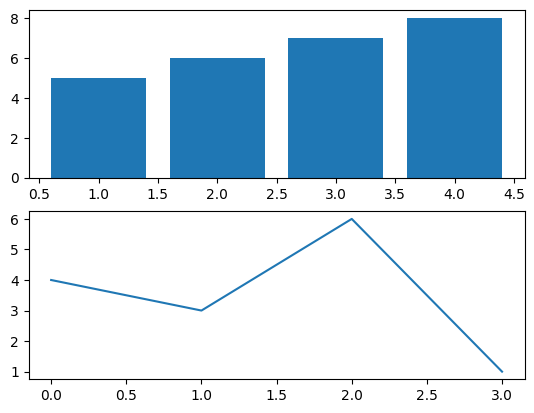

In [109]:
plt.subplot(2, 1, 1)
plt.bar([1,2,3,4], [5,6,7,8])
plt.subplot(2, 1, 2)
plt.plot([4,3,6,1])
plt.show()

In [110]:
month_data

price           
                        mean        sum
payment_month                          
02/2019        144701.897019  160185000
03/2019        142424.511545  160370000
04/2019        142802.491103  160510000
05/2019        139515.260323  155420000
06/2019        144392.605634  164030000
07/2019        144715.860899  170620000

In [114]:
month_data['price']['mean']

payment_month
02/2019    144701.897019
03/2019    142424.511545
04/2019    142802.491103
05/2019    139515.260323
06/2019    144392.605634
07/2019    144715.860899
Name: mean, dtype: float64

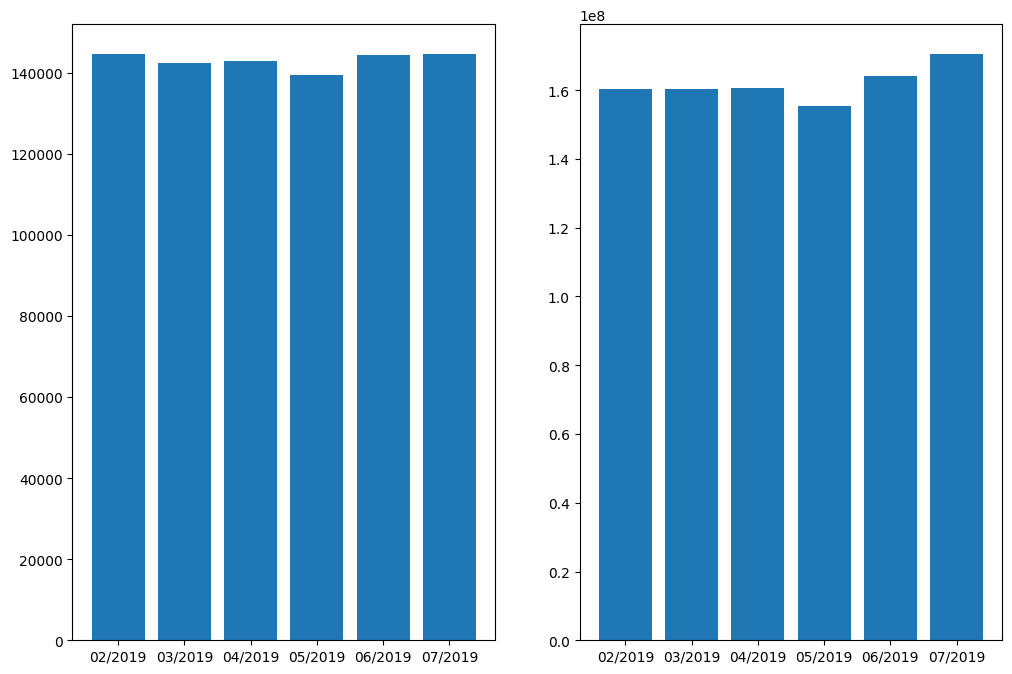

In [116]:
x = month_data.index
y1 = month_data['price']['mean']
y2 = month_data['price']['sum']

# 그래프 사이즈 변경
plt.figure(figsize = (12, 8))

plt.subplot(1, 2, 1)
plt.bar(x, y1)
plt.subplot(1, 2, 2)
plt.bar(x, y2)
plt.show()

In [123]:
pivot_data =  pd.pivot_table(
    group_data, 
    index = 'payment_month', 
    aggfunc = ['mean', 'max'], 
    values = 'price'
)

<AxesSubplot: xlabel='payment_month'>

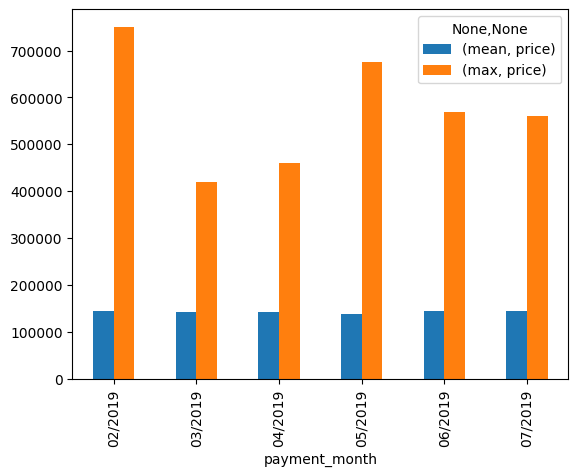

In [124]:
pivot_data.plot.bar()